# <center>MTMW14: Numerical Modelling of Atmospheres and Oceans 
<center>(31832278)

Import library that needed as numpy and matplotlib.pyplot

Import all the function from Code.py

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from Code import *

The El Niño South Oscillation (ENSO) is the most prominent phenomenon of coupled ocean-atmosphere variability. The essential mechanism that produces the oscillation involves the interaction between surface wind stress and thermocline depth. Jin (1997a) explained the observational result through a simple model, Recharge Oscillator Model (ROM), which is described by two differential equations:

$$\frac{dh_w}{dt} = -rh_w - \alpha b T_E - \alpha \xi_1 \tag{1}$$
$$\frac{dT_E}{dt} = RT_E + \gamma h_w - e_n(h_w + bT_e)^3 + \gamma \xi_1 + xi_2 \tag{2}$$

Where $T_E$ is SST anomaly and $h_w$ is ocean thermocline depth. The values are used non-dimensionalised in term of the SST-anomaly by scale of $[h]=150 m$, $[T]=7.5 K$, and $[t]=2$ months for anomalous thermocline depth, SST, and time variable, respectively. There are also for the parameters $c=1, r=0.25, \alpha=0.125, \gamma=0.75$, and $b_0=2.5$ are scaled in the same way.

$R = \gamma b - c$, while R describes the Bjerkness positive feedback hypotesis of the tropical ocean-atmospheric interaction and leads to instability when growth rate $\frac{(R - r)}{2} > 0$, allows oscillation when frequency:
$$\omega = \sqrt{\alpha b \gamma - \frac{(r + R)^2}{4}} \tag{3}$$

In the ROM, when the coupling parameter ($\mu$) at the critical value $\mu_c=\frac{2}{3}$ and under linear neutral oscillation, the growth rate becomes 0 and the critical frequency is $\omega_c=\sqrt{3/32}$, and the period of the oscillation is $\tau_c=2\pi/\omega_c$ ($\approx$ 41 months).

This project aims to explore the effects of nonlinearity ($e_n$), coupling coefficient ($\mu$), and wind stress ($\xi_1$) on coupled systems (ROM) by varying variables for each task.


## Result
### Task A: The neutral linear (deterministic) ROM
Simulate the recharge oscillator model at the neutral linear with using some criterias:
- Without external forcing ($\xi_{1,2} = 0$) or nonlinearity ($e_n = 0$); 
- Coupling parameter is set to $\mu = \mu_c = \frac{2}{3}$ with frequency $\omega_c = \sqrt{\frac{3}{32}}$; 
- Period is set to $\tau_c = \frac{2\pi}{\omega_c}$ ($\approx$ 41 months) 
- The initial conditions as $T = 1.125K$ and $h = 0$.

The simulations are performed using two methods, Euler Forward and Runge-Kutta 4th order, for one and five periods, respectively. These methods will be compared to determine which is more stable.

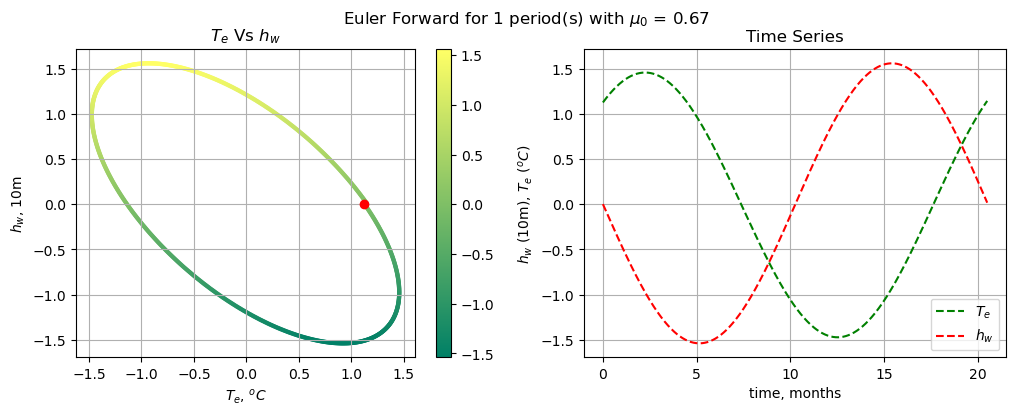

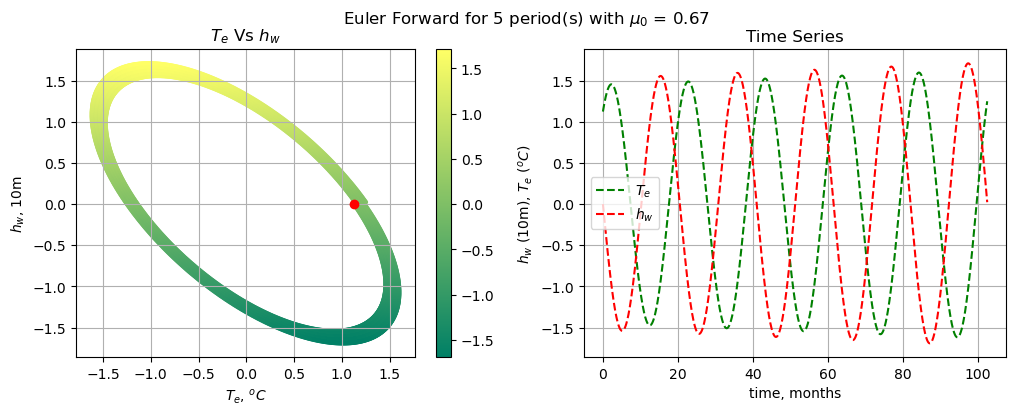

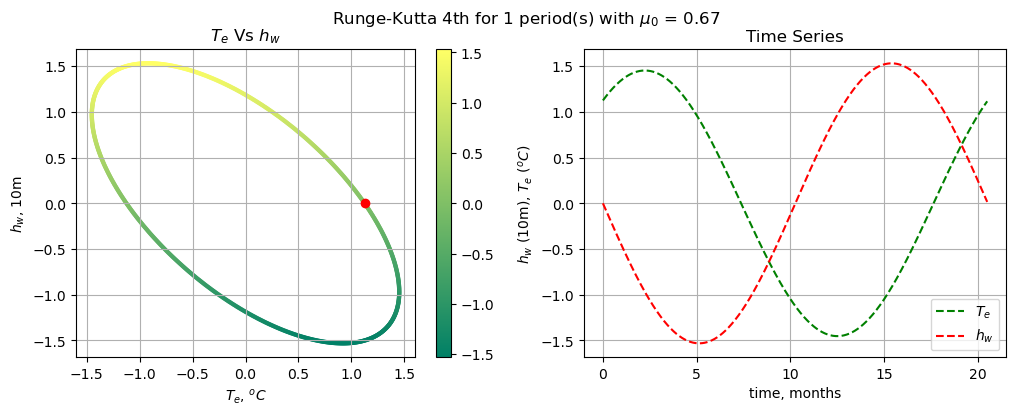

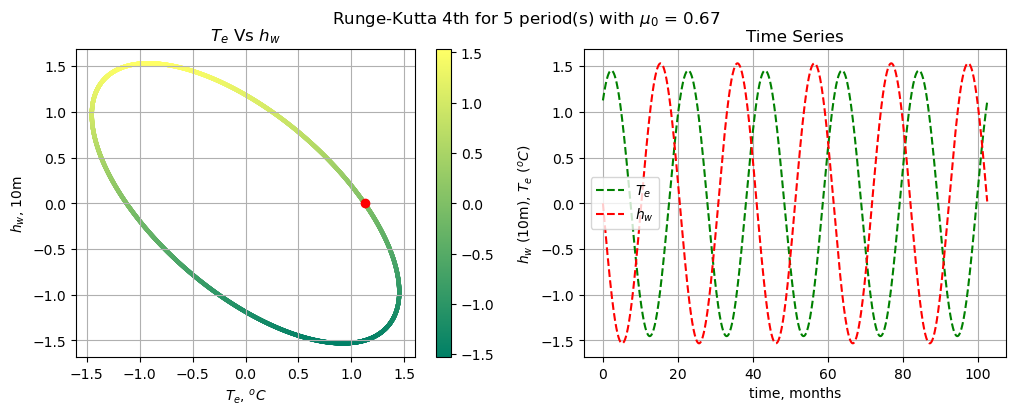

In [3]:
task(nop=1, euler=True)
task(nop=5, euler=True)

task(nop=1)
task(nop=5)

###### <center> Figure 1. Neutral Linear ROM of Euler Forward method (a) 1 period, (b) 5 periods. Neutral Linear ROM of Runge-Kutta 4th method (c) 1 period, (d) 5 periods.

The graphs show a comparison two numerical methods, the Euler Forward (EF) and the Runge-Kutta 4th order (RK4), applied to the Recharge Oscillator Model (ROM). 

In EF method, the phase space shows that the spiral trajectory looks as a closed loop (as shown in Fig. 1a), but its stability is questionable. This is confimed when the method extended to 5 periods (as shown in Fig. 1b), where the trajectory starts to spiral outwards, leading to an increasing radius. Correspondingly the time series plots show that both amplitudes ($T_e$ and $h_w$) increase over time. If we extended further, it will show an increasing oscillation without bound, indicating numerical instability.

In contrast, the RK4 method shows closed-loop trajectories for both periods (1 and 5) with a consistent radius that does not change over time in the phase space (as shown in Fig. 1c and 1d). Furthermore, the time series plots show consistent amplitudes and frequency of $T_e$ and $h_w$ and do not show a sign of increasing or decreasing over time.

In comparing between EF and RK4 methods, RK4 shows consistent performance even extended to 5 periods. The RK4 method maintains the closed-loop trajectory and the amplitude and frequency of $T_e$ and $h_w$, which is a stable numerical method. This is because RK4 is a higher-order numerical method, which typically provides greater accuracy and stability compared to the first-order EF method. Furthermore, the RK4 minimizes truncation errors that accumulate over time with the EF method. Additionally, the time step in RK4 is less than the EF that has larger time step. It is a limitation for EF in long-term predictions because of tendency to accumulate errors over time, which significantly reduces its accuracy.

### Task B: Testing ROM behaviour around sub-critical and super-critical settings of the coupling parameter
The model is re-run using the Runge-Kutta 4th method for 5 periods with variation in $\mu$, spesifically selection values where $\mu < \frac{2}{3}$ (sub-critical) and $\mu > \frac{2}{3}$ (super-critical). The model will be run when $\mu = 0.42 (\sim 5/12)$ and $0.58 (\sim 7/12)$ for sub-critical and $\mu = 0.75 (\sim 9/12)$ and $0.92 (\sim 11/12)$ for super-critical. The distances are similar for sub- and super-critical.
The result will be plot with time series of T, h, as well as the trajectory in T-h coordinates. Then, these results will be compared to the neutral case (Fig 1c and 1d).

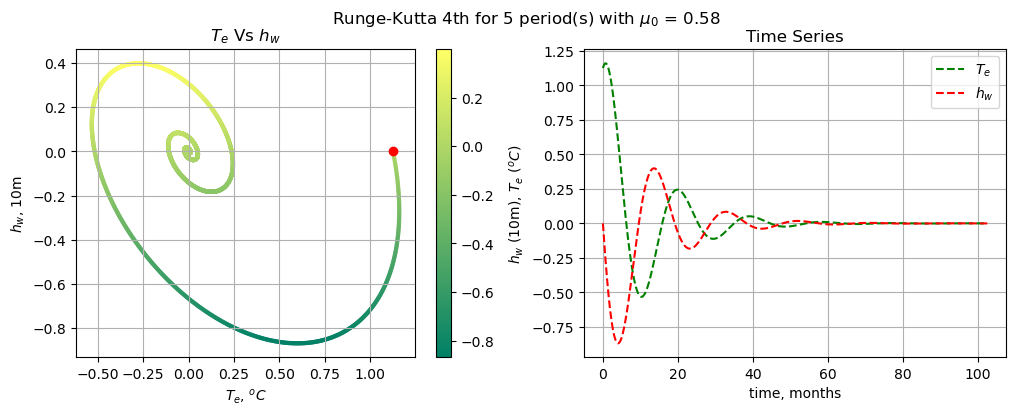

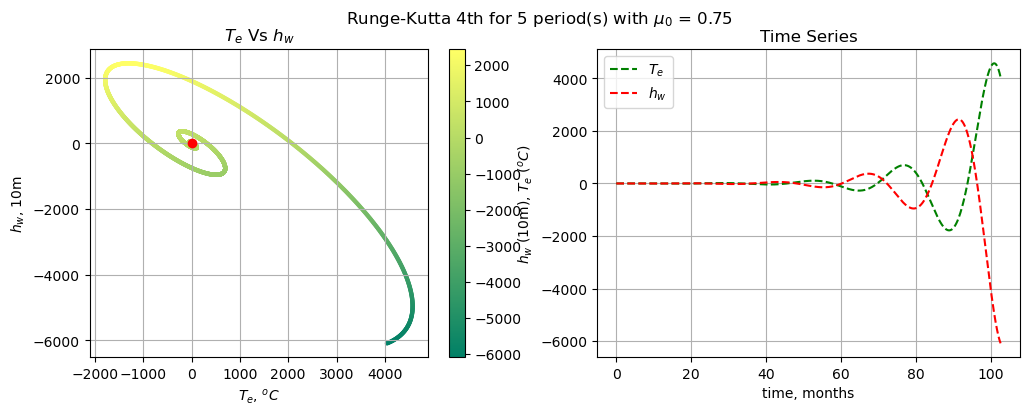

In [4]:
task(nop=5, mu_0=0.58)
task(nop=5, mu_0=0.75)

###### <center> Figure 2. ROM behaviour around sub-critical (a) 0.58 and super-critical (b) 075 points for the coupling parameter.

The $\mu$ parameter plays a crucial role in determining the behaviour of oscillations. For $\mu=0.58$ (as shown in Fig. 2a), the trajectory in the phase space shows a decaying spiral oscillation and rotating inward significantly over time (the diameter of the spiral decreases significantly). Correspondingly, the time series plot shows the amplitudes of both $T_E$ and $h_w$ are decreasing significantly. 

Conversely, for $\mu=0.75$ (as shown in Fig. 2b), the trajectory in the phase space shows an expanding spiral oscillation and rotating outward significantly over time. Corespondingly, the time series plot shows an increasing amplitudes in both $T_E$ and $h_w$ significantly, indicating instability model.

The linear growth rate of the ROM solution depending on $\mu$ is expressed as: 
$$\sigma_{1,2}=\frac{15}{16}\left( \frac{2}{3} -\mu\pm i \sqrt{(\mu-\mu_1)(\mu_2-\mu)} \right), \tag{4}$$
$$\mu_1=(8-\sqrt{28}/15), \quad \mu_2=(8+\sqrt{28}/15)$$

When $\mu$ is stronger than $\mu_c=2/3$, the linear growth rate ($\sigma_{1,2}$) increases and becomes positive, potentially leading to an unstable oscillatory. Conversely, when $\mu$ is not stronger than $\mu_c$, the linear growth rate ($\sigma_{1,2}$) decreases and becomes negative, stabilizing the system. Compare to $\mu=2/3$ (Fig. 1d), the linear growth rate ($\sigma_{1,2}$) is 0, resulting to maintain to oscillation amplitudes and radius sprial constant over time (as shown in Fig. 1d), resulting stable system.

If $\mu < \mu_1$, the $T_E$ and $h_w$ variables decay in different modes. But, if $\mu > \mu_2$, the oscillator breaks down to give two modes, one mode increasing and another decreasing, effectively leading the $T_E$ and $h_w$ become decouple. It explains that changing of $\mu$ is sensitive, as it directly influences the growth rate and the strength of coupling between variables. Furthermore, slight variation in $\mu$ can impact significantly the growth rate and coupling strength, leading to stability or instability.

### Task C: Extending ROM to include the impact of non-linearity
The model run by enabling the nonlinearity to $e_n = 0.1$ with critical value of the coupling parameter $\mu = \mu_c = \frac{2}{3}$. The result will be compare with the case without nonlinearity (see Fig 1d). Furthermore, $\mu$ will be set to $0.75$ and that result will be compare with the case without nonlinearity (see Fig 2c).

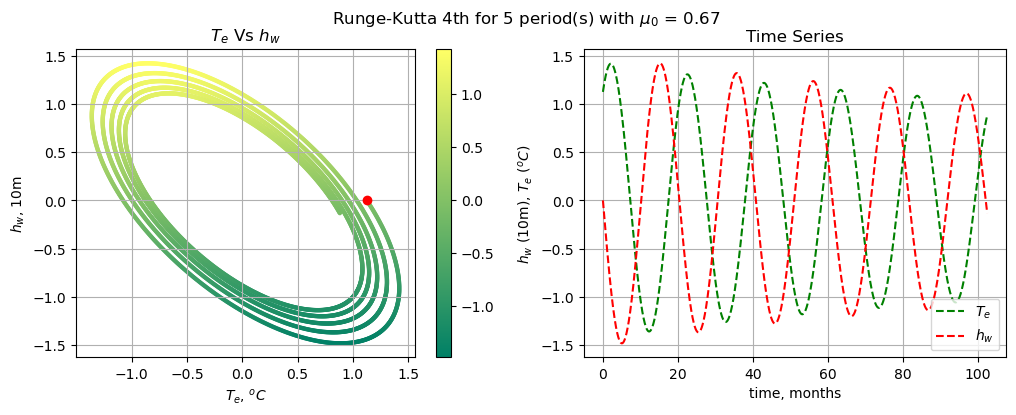

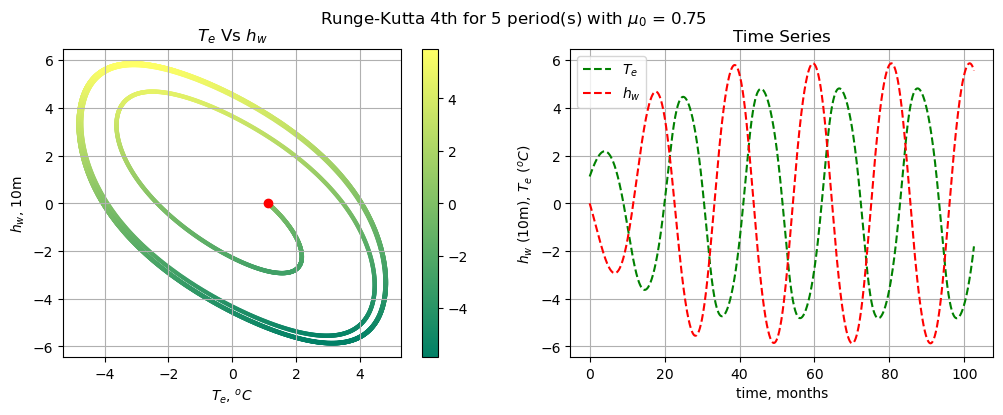

In [5]:
task(nop=5, e_n=0.1)
task(nop=5, mu_0=0.75, e_n=0.1)

###### <center> Figure 3. ROM behaviour enables nonlinearity when (a) critical and (b) supercritical values of the coupling parameter

The nonlinear solution using a perturbation method can be expressed as:
$$T_E=\sqrt{\Delta B} \sin(\omega t),$$
$$h_w = \frac{ab\mu_c}{\sqrt{(\omega_c + r^2)}} T_E(t - \eta_w) \tag{5}$$
where:
$$\omega = \omega_c + \Delta\Omega,$$
$$\eta_w = \eta \left(1 + \frac{\Omega}{\omega_c}\right) \tag{6}$$


In a nonlinear system where nonlinearity $e_n$ sets to $0.1$ and the coupling parameter at the critical value ($\mu=\frac{2}{3}$) (as shown in Fig. 3a), the phase space trajectory shows a decaying spiral oscillation and rotating inward over time, indicating a diminishing spiral radius gradually. Corespondingly, the time series plot shows a gradual decrease in the amplitudes of $T_E$ and $h_w$ over time.

In comparison to the neutral linear case (as shown in Fig. 1d), where a critical frequency ($\omega_c$) makes growth rate to be zero, leading to maintain the consistent amplitude and oscillation. However, introducing nonlinearity adds a feedback that prevents linear growth from maintaining oscillations and makes it decrease. 

Conversely, with coupling parameter in supercritical value ($\mu=0.75$) (as shown in Fig. 3b) leads to a different behaviour. Intially, the trajectory shows an expanding spiral and gradually increases the radius. Then, the system reaches a new steady state, indicating a constant radius and amplitudes in both $T_E$ and $h_w$.

In comparison to the supercritical system ($\Delta > 0$) without nonlinearity case (as shown in Fig. 2b) which is unstable, (oscillation expands significantly and amplitude of both $T_E$ and $h_w$ increases). In contrast, when the system enables the nonlinearity, it leads to new steady-state solution. The solution (Eq. 5) provides the limit of the linear growth rate and leads to a finitie amplitude oscillation, then it becomes similar to the linear neutral conditions ($\mu=\frac{2}{3}$), which is stable condition. The period is slightly influenced by the supercritical parameters and dominantly determined by the frequency ($\omega$) (Eq. 6). 

It is essential to note the influence of the nonlinearity factor $e_n$ n the system's response to stochastic perturbations. A smaller $e_n$ leads to a slower decay of autocorrelations over time. In contrast, a higher $e_n$ leads to stabilize faster.

### Task D: Test the self-excitation hypotheses
For this task, introduce an annual frequency to the issue by permitting the coupling parameter to fluctuate in an annual cycle ($\mu_{ann}$). The equation should be:

$$\mu = \mu_0(1+\mu_{ann} \cdot cos(\frac{2\pi t}{\tau}-\frac{5 \pi}{6})) \tag{7}$$
    
The model will be run using $e_n=0.1, \mu_0=0.75$, $\mu_{ann}=0.2, \tau=12$ months. This setting includes the annual cycle, which want to know the impact of the annual cycle on ROM. Then it will compare to without annual cycle (see Fig 3b).

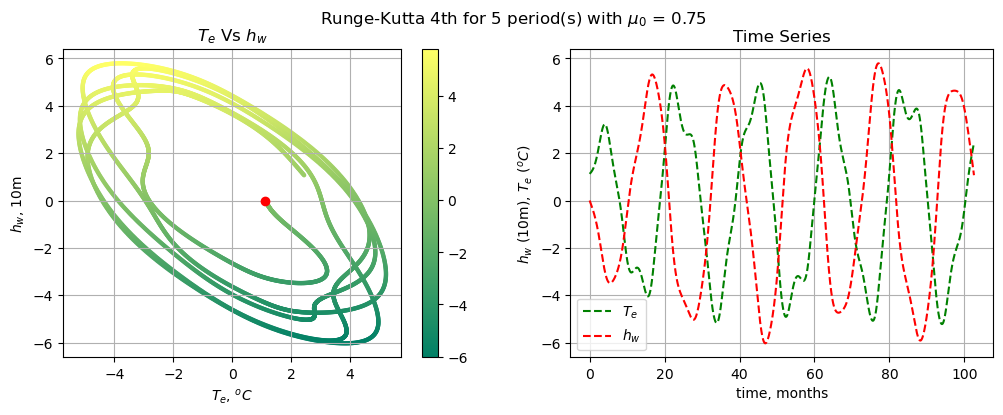

In [6]:
task(nop=5, mu_0=0.75, mu_ann=0.2, tau=6, e_n=0.1)

###### <center> Figure 4. ROM behaviour with nonlinearity and annual cycle in coupling parameter

Based on Fig. 4, the trajectory in phase space shows an expanding spiral oscillation, which rotates outward gradually and displays a varying spiral radius. Particularly, the trajectory is bounded, implying a limit to the expansion. The pattern does not form a simple close spiral but evolves into a more complex pattern, reflecting the complex interaction between $T_e$ and $h_w$. Correspondingly, the time series plot shows that the amplitude and frequency of $T_E$ and $h_w$ vary over time. These oscillations do not appear perfectly periodic and show irregular in amplitudes and frequency. The irregularities are a response to the annual cylce ($\mu_{ann}$) in the coupling parameter (Eq. 7).

If we compare to Fig. 3b, the nonlinearity provides the limit on linear growth and leads to a finitie amplitude oscillations. So, the amplitudes do not increase significantly over time. However, the annual cycle introduces irregularities the radius of the spiral in phase space and the amplitude in time series, suggesting a dynamic rather than a static system.

Initially, the system gives an unstable oscillatory mode, but the nonlinearity constrains the linear growth, leading to a finitie amplitude oscillation (as shown in Fig. 3b and 4). The addition of an annual cycle in the coupling parameter introduces periodic variations in both the phase space and the time series of the system. This suggests that variations in $\mu_{ann}$ (the strength of the annual forcing) can affect the coupling parameter, potentially affect the growth rate and stability of the system.

### Task E: Test the stochastic initiation hypotheses by adding noisy wind forcing
For improvement, the model is added by 'Wind Stress Forcing' as a physical parameterization by setting:

$$\xi_1 = f_{ann} \cdot cos\left ( \frac{2\pi t}{\tau} \right ) + f_{ran}W\frac{\tau_{cor}}{\Delta t} \tag{8}$$

Where $W$ is a random number between $-1 and +1$ after every interval $\tau_{cor}$. The model will be run with settings: $e_n=0, \mu_{ann}=0.2, f_{ann}=0.02, f_{ran}=0.2, \tau_{cor}=1$ day, and time step $\Delta t=1$ day. Moreover, the model will be run using $\mu_0=0.67$ and $\mu_0=0.75$. Those results will be compare to non physical parameterization (see Fig 2c and 3b).

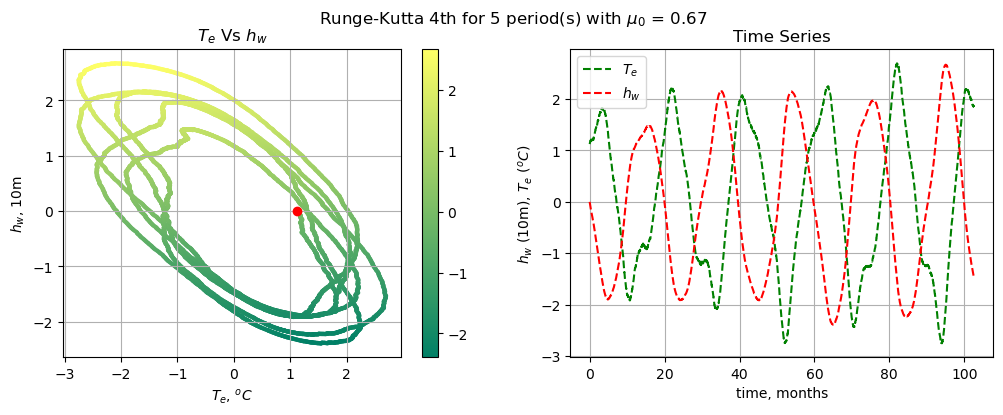

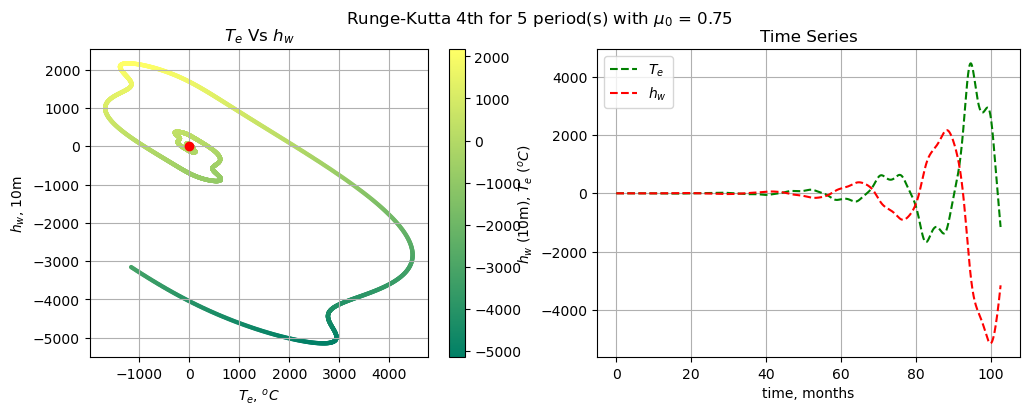

In [7]:
task(nop=5, dt=1/60, mu_0=0.67, mu_ann=0.2, f_ann=0.02, f_ran=0.2, tau_cor=1/60)
task(nop=5, dt=1/60, mu_0=0.75, mu_ann=0.2, f_ann=0.02, f_ran=0.2, tau_cor=1/60)

###### <center> Figure 5. ROM behaviour by adding noisy wind forcing for (a) critical value and (b) supercritical values 

In the top figures ($\mu_0=0.67$) (as shown in Fig. 5a), the phase space trajectory shows a spiral oscillation that is more restrictive and less expansive compared to the bottom figures ($\mu_0=0.75$). Correspondingly, the time series shows the variability in the amplitude and frequency of $T_E$ and $h_w$ over time, with the oscillations that are not perfectly periodic and show variation in peak heights. 

In the bottom figures ($\mu_0=0.75$) (as shown in Fig. 5b), the phase space trajectory shows an expanding oscillation significantly over time. The expansion is not consistent with a perfect spiral pattern. Corresponding to the time series, there is an initial stability, then shows an increasing amplitudes in both $T_E$ and $h_w$ gradually.

The oscillation variations are caused by the annual cycle parameter ($\mu_{ann}$), which indicates the strength of the annual forcing. When $\mu_0=0.67$ (critical value), the system provides stable conditions as in neutral linear conditions (as shown in Fig. 1d). However, introducing $\mu_{ann}$ into the system makes the oscillations not perfectly periodic in both $T_E$ and $h_w$. Because of $\mu_0=0.67$, the linear growth rate is nearly 0 that system attempts to maintain oscillations within certain limits, preventing a significant increase the intensity of the oscillations. Nonetheless, there is inconsistency observed in the time series and a less smooth trajectory in the phase space.

In contrast, at the supercritical ($\mu_0=0.75$), the trajectory grows significantly in both scenarios - with (as shown in Fig. 5b) and without wind forcing (as shown in Fig. 2b). However, the oscillation in Fig. 2b shows a more organized pattern compared to the oscillation in Fig. 5b that is more intricate pattern. In the time series for both scenarios, there is an initial stable condition, then increases significantly due to annual forcing. However, the oscillations in Fig. 5b are unperfectly periodic and less smooth in amplitude and frequencies of $T_E$ and $h_w$ caused by annual ($f_{ann}$) and random forcing ($f_{ran}W$).

The effect of the annual forcing ($f_{ann}$) and random wind stress forcing ($f_{ran}W$) can be clearly at the supercrital conditions. The combination of these forcing introduces more complexity into the system, leading to more unpredictable pattern in the time series and the phase space. The random forcing adds a layer of stochastic or random perturbations, leading variability that cannot be predicted, potentially gives trajectories less smooth. Besides, the annual forcing is a deterministic form of perturbation that influences the frequency of the oscillations that shown in time series the amplitude increases significantly. 

### Task F: Test the non-linearity and the stochastic forcing together
For improvement from previous task, the model is run with nonlinearity $e_n=0.1$. The result will be compare with stochastic forcing (see Fig 5).

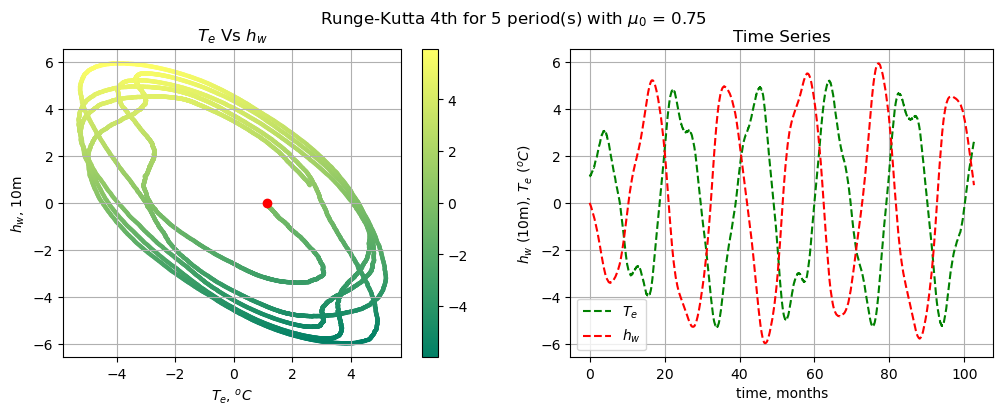

In [8]:
task(nop=5, dt=1/60, mu_0=0.75, e_n=0.1, mu_ann=0.2, f_ann=0.02, f_ran=0.2, tau_cor=1/60)

###### <center> Figure 6. ROM behaviour by adding noisy wind forcing and nonlinearity for supercritical values 

When the system with wind forcing and supercritical coupling parameter is added with nonlinearity ($e_n=0.1$) (as shown in Fig. 6), the phase space trajectory shows an expanding spiral oscillation. It rotates outward gradually and displays a varying spiral radius, suggesting a bounded growth. It shows a more complex pattern, reflecting the complex interaction between $T_e$ and $h_w$. Correspondingly, the time series plot shows that the amplitude and frequency of $T_E$ and $h_w$ vary over time. However,these oscillations do not appear perfectly periodic and show irregular in amplitude and frequency.

Comparing the nonlinear model with stochastic (as shown in Fig. 5b), Fig. 5b shows significantly expanding oscillation in the trajectory, implying an unbounded growth. In contrast, with nonlinearity, the trajectory does not increase boundlessly and tends to be stable because of the limit of the growth rate. This case happened because the nonlinearity provides a limit to the growth rate and causes to a finite amplitude oscillation, leading to neutral conditions (as shown in Fig. 5a).

This demonstrates that nonlinearity can provide a limit in uncontrolled expansion, which is usually associated with linear growth rate. The effect of nonlinearity makes the growth rate not increase significantly without limit, but rather closer to the state of dynamic balance, charaterized by limited and stable oscillations.

### Task G: Test whether chaotic behaviour can be triggered through addition of initial condition uncertainty
Designing forecast ensemble by creating 50 model simulations as random numbers centered around their original values with distance 0.02 (uniform perturbation). Then, the model is used $\mu_0=0.75$ and added nonlinearity ($e_n=0.1$). This simulation introduces varibility in the ensemble, allowing for the exploration. 

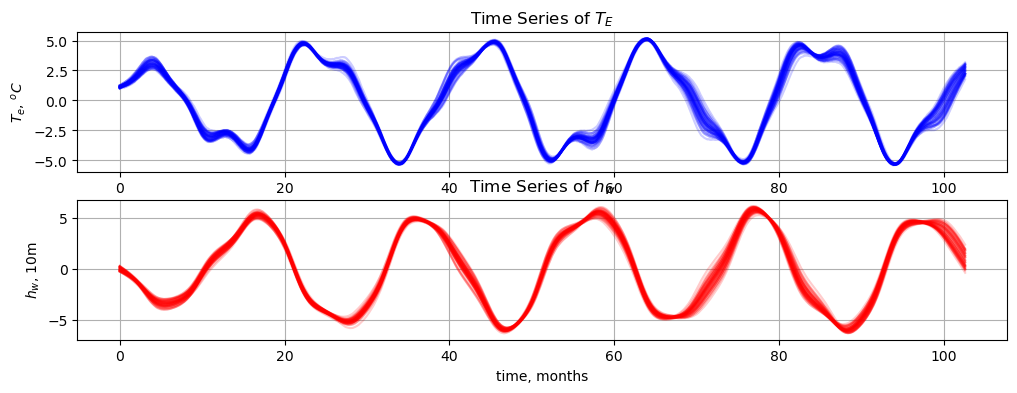

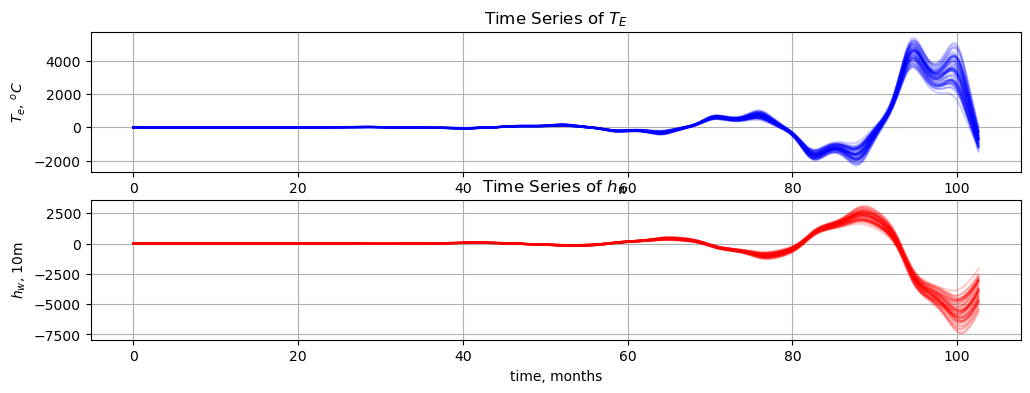

In [9]:
taskG(nop=5, dt=1/60, mu_0=0.75, e_n=0.1, mu_ann=0.2, f_ann=0.02, f_ran=0.2, tau_cor=1/60)
taskG(nop=5, dt=1/60, mu_0=0.75, e_n=0, mu_ann=0.2, f_ann=0.02, f_ran=0.2, tau_cor=1/60)

###### <center> Figure 7. The ROM with 50 members of ensemble at supercritical (a) with nonlinearity and (b) without nonlinearity

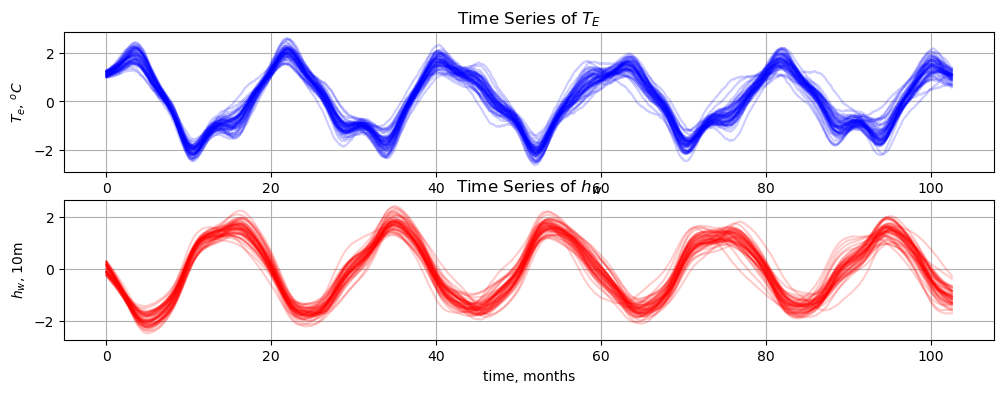

In [10]:
taskG(nop=5, dt=1/60, mu_0=0.67, e_n=0.1, mu_ann=0.2, f_ann=0.02, f_ran=0.2, tau_cor=1/60)

###### <center> Figure 7. The ROM with 50 members of ensemble at supercritical (c) with nonlinearity and (d) without nonlinearity

In the top graph (Time vs $T_E$), the SST anomalies associated with ENSO, which the ENSO signal is represented as the pattern of peaks and troughs corresponding to the warm phases (El Nino) with positive anomalies and the cold phases (La Nina) with negative anomalies. 

In the bottom graph (Time vs $h_w$), the thermocline depth influenced by ENSO, which the pattern is a part of the ENSO signal. During El Nino, the thermochline depth ($h_w$) is deeper due to the warmer pool, while during La Nina, it is shallower due to upwelling of coller pool. Consequently, a correlation between $T_E$ and $h_w$ would be expected, as these variables are connected (Eq. 1 and 2) through ENSO's effects on Pacific ocean.

Based on two graphs, the model shows consistent and reguler oscillation patterns, indicating a stable model with predictable behaviour. This is due to nonlinearity ($e_n=0.1$) conditions that constrain the growth of oscillations from increasing significantly (as shown in Fig. 6a). If the model deactive the nonlinearity ($e_n=0$) conditions, the growth of the oscillations will be significant and uncontrolable and be unstable model (as shown in Fig. 6b), it is similar with Fig. 5b. If the model uses a critical value ($\mu_0=2/3$), then the model will tend to be stable (as shown in Fig. 5b), even it is not perfectly periodic but it tends to be stable. Furthermore, if we deactive the nonlinearity and use critical value (as shown in Fig. 6c), it introduces additional feedback that make the linear growth decrease (as shown in Fig. 3a). However, the oscillations in both graphs are not perfectly regular, due to the annual cycle, indicating that ENSO are not always easily predictable and smooth (Fig. 1d and 3). The annual cycle is crucial in this model because it can introduce unpredictable patterns.

To induce chaotic behavior in the model, deactivating the nonlinearity under supercritical conditios, which lead to uncontrolable growth and instability (as shown in Fig. 6b). Furthermore, three-dimensional bounded dynamical systems with quadratic nonlinearity are capable of exhibit chaotic models and aperiodic behavior (Vallis, 1986).

### References
Jin, F.-F. (1997a). An equatorial ocean recharge paradigm for ENSO: Part I: Conceptual model. J. Atmos.Sci., 54, 811–829.

Vallis, G. K. (1986). El Niño: A chaotic dynamical system?. Science, 232(4747), 243-245.